$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[1]{\langle | {#1} | \rangle}
$$


# Emaranhamento

## Estados puros emaranhados

Vimos que estados puros emaranhados não podem ser escritos como produto. Para um sistema composto com $$N$$ partes, isso significa que um estado emaranhado não pode ser escrito como

$$
|\Psi\rangle \neq |\psi_1\rangle \otimes |\psi_2\rangle \otimes ... \otimes |\psi_N\rangle .
$$

Um exemplo para dois qubits $A$ e $B$ é um estado de "Bell"-like parcialmente emaranhado.

\begin{align*}
|\Psi_{AB}\rangle & = \sqrt{p}|0_A 1_B\rangle + \sqrt{1-p}|1_A 0_B\rangle\\
& = \begin{pmatrix}
0 \\ 
\sqrt{p} \\
\sqrt{1-p} \\
0
\end{pmatrix},
\end{align*}

com $|p| \leq 1$.

In [1]:
%matplotlib notebook
import numpy as np
import qutip as qp
import matplotlib.pyplot as plt

In [2]:
# estados da base
zero = qp.basis(2,0)
one = qp.basis(2,1)

# Bell parcial
def partial_Bell_Psi_minus(p):
    return np.sqrt(p)* qp.tensor(zero, one) + np.sqrt(1-p)* qp.tensor(one,zero)

In [3]:
Psi_AB = partial_Bell_Psi_minus(0.1)
Psi_AB

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.31622777]
 [0.9486833 ]
 [0.        ]]

In [4]:
rho_AB = qp.ket2dm(Psi_AB)

# no qutip, os índices do ptrace são as componentes a serem retidas!!!
rho_A = rho_AB.ptrace(0)
rho_B = rho_AB.ptrace(1)
rho_AB, rho_A, rho_B

(Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.  0.  0.  0. ]
  [0.  0.1 0.3 0. ]
  [0.  0.3 0.9 0. ]
  [0.  0.  0.  0. ]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.1 0. ]
  [0.  0.9]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.9 0. ]
  [0.  0.1]])

In [5]:
SA = qp.entropy_vn(rho_A)
SB = qp.entropy_vn(rho_A)
SAB = qp.entropy_vn(rho_AB)
IAB = qp.entropy_mutual(rho_AB, 0, 1)
SA, SB, SAB, IAB, SA+SB-SAB

(0.3250829733914483,
 0.3250829733914483,
 6.764446592961463e-17,
 0.6501659467828965,
 0.6501659467828965)

Vamos estudar as entropias e informação mútua em função de $p$



<IPython.core.display.Javascript object>


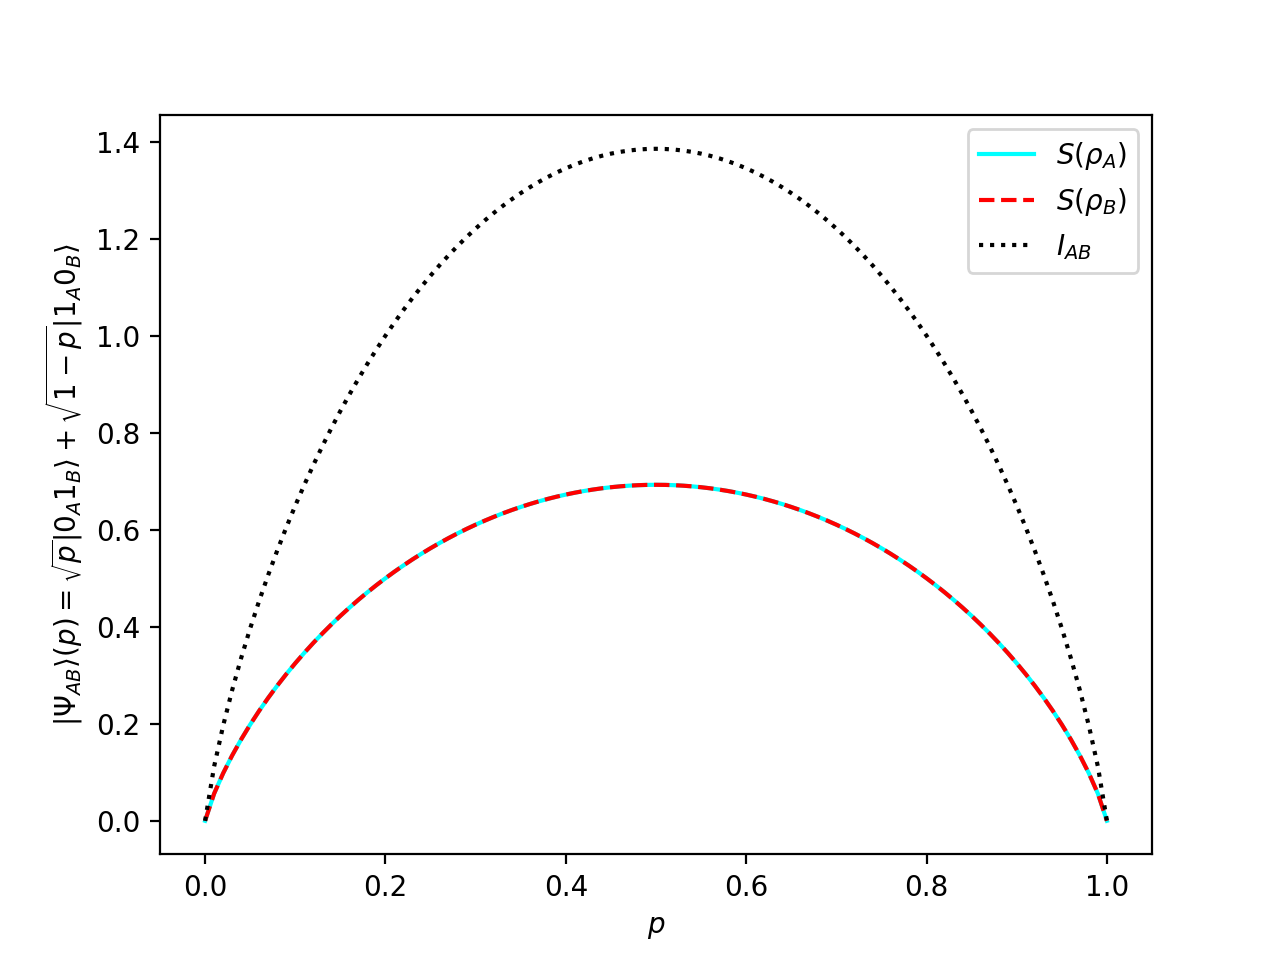

In [6]:
fig, ax = plt.subplots()

ps = np.linspace(0,1.0, 101)
SA_p = np.zeros_like(ps)
SB_p = np.zeros_like(ps)
IAB_p = np.zeros_like(ps)

for i, p in enumerate(ps):
    Psi_AB = partial_Bell_Psi_minus(p)
    rho_AB = qp.ket2dm(Psi_AB)
    rho_A = rho_AB.ptrace(0)
    rho_B = rho_AB.ptrace(1)
    SA_p[i] = qp.entropy_vn(rho_A)
    SB_p[i] = qp.entropy_vn(rho_A)
    IAB_p[i] = qp.entropy_mutual(rho_AB, 0, 1)


    
ax.plot(ps, SA_p, color='cyan', label=r'$S(\rho_A)$')
ax.plot(ps, SB_p, color='red', linestyle='--', label=r'$S(\rho_B)$')
ax.plot(ps, IAB_p, color='black', linestyle=':', label=r'$I_{AB}$')

ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$|{\Psi_{AB}}\rangle(p) = \sqrt{p}|0_A 1_B\rangle + \sqrt{1-p}|1_A 0_B\rangle$')

leg = ax.legend()

### Mais estados emaranhados: 3 qubits

Para três qubits, dois estados maximamente emaranhados são o GHZ e o W, definidos, respectivamente como:

$$ 
\ket{GHZ}  = \frac{1}{\sqrt{2}}(\ket{0_A 0_B 0_C} + \ket{1_A 1_B 1_C}) $$

e

$$
\ket{W} = \frac{1}{\sqrt{3}} (\ket{0_A 0_B 1_C} + \ket{0_A 1_B 0_C} + \ket{1_A 0_B 0_C}).
.
$$

Vamos calcular as matrizes de densidade reduzidas de cada qubit $\rho_j$ nestes dois estados e comparar suas entropias com as matrizes de densidade reduzidas de dois qubits $\rho_{ij}$, $i,j=A,B,C$. 


In [7]:
# Estado GHZ
GHZ = 1/ np.sqrt(2) * ( qp.tensor(zero, zero, zero) + qp.tensor(one, one, one) )

rho_A = GHZ.ptrace(0)
rho_B = GHZ.ptrace(1)
rho_C = GHZ.ptrace(2)

rho_AB = GHZ.ptrace([0,1])
rho_BC = GHZ.ptrace([1,2])
rho_AC = GHZ.ptrace([0,2])


GHZ, rho_A, rho_B, rho_C, rho_AB, rho_BC, rho_AC

(Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.70710678]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.5 0. ]
  [0.  0.5]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.5 0. ]
  [0.  0.5]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.5 0. ]
  [0.  0.5]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.5 0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0.5]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.5 0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0.5]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isher

In [8]:
# Entropias
print('estados reduzidos de um qubit')
print(f'S(GHZ)={qp.entropy_vn(GHZ)}, S(rho_A) =  {qp.entropy_vn(rho_A)}, S(rho_B) =  {qp.entropy_vn(rho_B)}, S(rho_C) = {qp.entropy_vn(rho_C)}'  )
print('\nestados reduzidos de dois qubits')
print(f'S(rho_AB) =  {qp.entropy_vn(rho_AB)}, S(rho_BC) =  {qp.entropy_vn(rho_BC)}, S(rho_AC) = {qp.entropy_vn(rho_AC)}'  )


estados reduzidos de um qubit
S(GHZ)=9.992007221626399e-16, S(rho_A) =  0.6931471805599454, S(rho_B) =  0.6931471805599454, S(rho_C) = 0.6931471805599454

estados reduzidos de dois qubits
S(rho_AB) =  0.6931471805599454, S(rho_BC) =  0.6931471805599454, S(rho_AC) = 0.6931471805599454


In [9]:
# Estado W
W = 1/ np.sqrt(3) * ( qp.tensor(zero, zero, one) + qp.tensor(zero, one, zero) + qp.tensor(one, zero, zero))

rho_A = W.ptrace(0)
rho_B = W.ptrace(1)
rho_C = W.ptrace(2)

rho_AB = W.ptrace([0,1])
rho_BC = W.ptrace([1,2])
rho_AC = W.ptrace([0,2])


W, rho_A, rho_B, rho_C, rho_AB, rho_BC, rho_AC

(Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.        ]
  [0.57735027]
  [0.57735027]
  [0.        ]
  [0.57735027]
  [0.        ]
  [0.        ]
  [0.        ]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.66666667 0.        ]
  [0.         0.33333333]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.66666667 0.        ]
  [0.         0.33333333]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.66666667 0.        ]
  [0.         0.33333333]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.33333333 0.         0.         0.        ]
  [0.         0.33333333 0.33333333 0.        ]
  [0.         0.33333333 0.33333333 0.        ]
  [0.         0.         0.         0.        ]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), ty

In [10]:
# Entropias
print('estados reduzidos de um qubit')
print(f'S(W)={qp.entropy_vn(W)}, S(rho_A) =  {qp.entropy_vn(rho_A)}, S(rho_B) =  {qp.entropy_vn(rho_B)}, S(rho_C) = {qp.entropy_vn(rho_C)}'  )
print('\nestados reduzidos de dois qubits')
print(f'S(rho_AB) =  {qp.entropy_vn(rho_AB)}, S(rho_BC) =  {qp.entropy_vn(rho_BC)}, S(rho_AC) = {qp.entropy_vn(rho_AC)}'  )


estados reduzidos de um qubit
S(W)=5.010217487301582e-16, S(rho_A) =  0.6365141682948128, S(rho_B) =  0.6365141682948128, S(rho_C) = 0.6365141682948128

estados reduzidos de dois qubits
S(rho_AB) =  0.636514168294813, S(rho_BC) =  0.636514168294813, S(rho_AC) = 0.636514168294813


## Decomposição em Valores Singulares (SVD - single value decomposition)

A **decomposição em valores singulares (SVD)** é uma técnica fundamental em álgebra linear que tem aplicações importantes em ciência da computação, aprendizado de máquina e informação quântica. Ela decompõe uma matriz $M \in \mathbb{C}^{m \times n}$ como:  
$$
M = U \Sigma V^\dagger
$$
onde:  
- $U$ é uma matriz unitária $m \times m$,  
- $\Sigma$ é uma matriz diagonal $m \times n$ com valores singulares não negativos,  
- $V^\dagger$ é a transposta conjugada de uma matriz unitária $n \times n$.

### Aplicação em Informação Quântica

No contexto de estados puros emaranhados, a SVD é usada para descrever a separabilidade entre subsistemas. Um estado puro bipartido $\ket{\psi} \in \mathcal{H}_A \otimes \mathcal{H}_B$ pode ser reescrito, via a **decomposição de Schmidt**, como:  
$$
\ket{\psi} = \sum_{i} \lambda_i \ket{u_i}_A \otimes \ket{v_i}_B
$$
onde $\{\lambda_i\}$ são os valores singulares não negativos obtidos via SVD, e $\{\ket{u_i}\}, \{\ket{v_i}\}$ são bases ortonormais dos subsistemas $A$ e $B$. A decomposição de Schmidt revela o grau de emaranhamento entre os subsistemas, com $\lambda_i = 0$ para estados separáveis e $\lambda_i > 0$ para emaranhados.



In [37]:
# Gera um estado puro aleatório de 4 qubits

state = qp.rand_ket(2**4)  # Vetor de estado no espaço completo de 4 qubits
# Converte o estado puro para uma matriz densidade
rho = qp.ket2dm(state)

rho = qp.Qobj(rho.full(), dims=[[2, 2, 2, 2], [2, 2, 2, 2]])

# Traço parcial sobre os últimos dois qubits (subsistema [2, 3])
rho_A = qp.ptrace(rho, [0, 1])  # Mantém os primeiros dois qubits (0 e 1)

# Decomposição SVD da matriz densidade reduzida
U, S, Vh = np.linalg.svd(rho_A.full(), full_matrices=True)

# Exibe as matrizes e os valores singulares
print("Matriz U:\n", U)
print("\nValores singulares (diagonal de Σ):\n", S)
print("\nMatriz Vh (V Hermitiano):\n", Vh)

Matriz U:
 [[-0.30177546+1.88230051e-17j -0.48341141+5.01946803e-17j
  -0.80894672-2.66659239e-17j  0.14439594+6.27433503e-17j]
 [ 0.54667477+1.53601530e-01j -0.51308823+3.52456077e-01j
   0.17835147-2.76279467e-01j  0.4239535 -4.68220055e-02j]
 [ 0.55014694+8.53847107e-02j -0.21723645-1.81567156e-01j
  -0.20777622+5.57174490e-02j -0.74152794-1.17262135e-01j]
 [-0.47586386+2.23799491e-01j -0.21692714+5.01610310e-01j
   0.22108665-3.77241196e-01j -0.48215884+3.36111496e-02j]]

Valores singulares (diagonal de Σ):
 [0.57895994 0.29943042 0.11541028 0.00619936]

Matriz Vh (V Hermitiano):
 [[-0.30177546+0.j          0.54667477-0.15360153j  0.55014694-0.08538471j
  -0.47586386-0.22379949j]
 [-0.48341141+0.j         -0.51308823-0.35245608j -0.21723645+0.18156716j
  -0.21692714-0.50161031j]
 [-0.80894672+0.j          0.17835147+0.27627947j -0.20777622-0.05571745j
   0.22108665+0.3772412j ]
 [ 0.14439594+0.j          0.4239535 +0.04682201j -0.74152794+0.11726214j
  -0.48215884-0.03361115j]]
